<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DLBasic/IntroDLwithPytorch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 구현하기

## 로지스틱 회귀
binary classification 풀기
이를 위해서는 선형 함수가 아닌, S자 형태의 함수가 필요. 대표적인 예시는 sigmoid.

### Sigmoid
$$H(x) = sigmoid(Wx+b) = \frac{1}{1+e^{-(Wx+b)}} $$

### Cost fun of sigmoid
근데, 이를 MSE를 쓰면 local minimum나옴. 안됨.



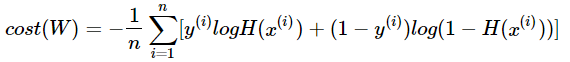

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [4]:
# 바로 행렬 현태로 가설을 세우자.
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [6]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [7]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [8]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


## nn.Module로 구현하기

In [18]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [19]:
## nn.Sequeitnal
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [20]:
model(x_train)

tensor([[0.6906],
        [0.7602],
        [0.7841],
        [0.8471],
        [0.8799],
        [0.9002]], grad_fn=<SigmoidBackward>)

In [21]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.755548 Accuracy 50.00%
Epoch   10/1000 Cost: 0.460449 Accuracy 66.67%
Epoch   20/1000 Cost: 0.477890 Accuracy 66.67%
Epoch   30/1000 Cost: 0.398028 Accuracy 83.33%
Epoch   40/1000 Cost: 0.337632 Accuracy 83.33%
Epoch   50/1000 Cost: 0.285184 Accuracy 83.33%
Epoch   60/1000 Cost: 0.237767 Accuracy 100.00%
Epoch   70/1000 Cost: 0.195865 Accuracy 100.00%
Epoch   80/1000 Cost: 0.165161 Accuracy 100.00%
Epoch   90/1000 Cost: 0.148542 Accuracy 100.00%
Epoch  100/1000 Cost: 0.137933 Accuracy 100.00%
Epoch  110/1000 Cost: 0.128964 Accuracy 100.00%
Epoch  120/1000 Cost: 0.121113 Accuracy 100.00%
Epoch  130/1000 Cost: 0.114179 Accuracy 100.00%
Epoch  140/1000 Cost: 0.108012 Accuracy 100.00%
Epoch  150/1000 Cost: 0.102491 Accuracy 100.00%
Epoch  160/1000 Cost: 0.097519 Accuracy 100.00%
Epoch  170/1000 Cost: 0.093018 Accuracy 100.00%
Epoch  180/1000 Cost: 0.088924 Accuracy 100.00%
Epoch  190/1000 Cost: 0.085184 Accuracy 100.00%
Epoch  200/1000 Cost: 0.081753 Accuracy 100.00

In [22]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2499, 1.5162]], requires_grad=True), Parameter containing:
tensor([-14.4676], requires_grad=True)]
